Data Mining [H02C6a] - Spring 2019

# Session 1: Exploratory Data Analysis with `pandas`

The goal of this exercise session is to get familiar with the first stage of the data minig process - explorative data analysis (EDA) and data visualisation. 

## Short introduction (for those not familiar with `pandas`)

<img src = '../img/pandas.jpg' width = 35% align=right>

<a href = 'http://pandas.pydata.org/'>`pandas`</a> is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. `pandas` makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. Together with <a href = 'https://matplotlib.org/'>`matplotlib`</a> and <a href = 'https://seaborn.pydata.org/'>`seaborn`</a>, `pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `pandas` are `Series` and `DataFrame`. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrame`s are great for representing real data: rows correspond to instances (objects, observations, etc.), and columns correspond to features for each of the instances.

## Exercise 1: Hospital Data

In this exercise, you will perform a preliminary analysis of the data set containing patient information from a number of hospitals. 

Look through the notebook, run the cells one by one answering the questions and completing missing parts of the code where neccessary.

If you have a question about `pandas` functionality, use Google and official documentation first!

<i>The exercises can be done in groups of 4-5 people.</i>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

## First glance at the data

The following snippet loads the `patients.csv` file and prints attribute names and types. You can have a look at the first few rows of the dataset using the `head` function:

In [2]:
data = pd.read_csv('../datasets/patients.csv', na_values=['?'])

# How many records and attributes are there?
print('There are ' + str(data.shape[0]) + ' records')
print('There are ' + str(data.columns.size) + ' attributes:')

# What are the attributes?
data_types = data.dtypes
print(data_types)

# Let's have a look at the first couple of records
data.head()

There are 1000 records
There are 14 attributes:
hospital       object
gender         object
age             int64
height        float64
weight          int64
bmi           float64
diagnosis      object
blood_test     object
ecg            object
ultrasound     object
mri            object
xray           object
children      float64
months        float64
dtype: object


,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,sports,f,24,5.747,194,28.8,fracture,NaN,f,NaN,f,t,NaN,NaN
1,general,m,33,1.640,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
2,general,m,48,1.930,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
3,general,f,23,1.540,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
4,general,m,27,1.940,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN


The `describe` method shows basic statistical characteristics of each <i>numerical</i> feature in a data frame (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [3]:
data.describe()

,age,height,weight,bmi,children,months
count,1000.000000,1000.000000,1000.000000,1000.000000,325.000000,330.000000
mean,31.760000,2.692463,107.602000,26.534500,0.855385,5.151515
std,13.570725,1.896209,61.601837,2.310324,0.720517,2.200044
min,0.000000,1.260000,44.000000,19.500000,0.000000,1.000000
25%,21.000000,1.650000,70.000000,25.000000,0.000000,3.000000
50%,30.000000,1.760000,81.000000,26.600000,1.000000,5.000000
75%,39.250000,1.960000,104.000000,28.100000,1.000000,7.000000
max,80.000000,7.700000,341.000000,34.300000,2.000000,9.000000


In order to obtain statistics for nominal features, you should explicitly specify that you want to consider the `object` data type. For each nominal feature in the data, you will get the number of non-missing values, unique values count, most common value and the corresponding count:

In [4]:
data.describe(include=['object'])

,hospital,gender,diagnosis,blood_test,ecg,ultrasound,mri,xray
count,1000,675,1000,714,600,480,214,611
unique,3,2,7,2,2,2,2,2
top,general,m,pregnancy,t,t,t,f,f
freq,461,351,318,508,389,375,133,465


## Dealing with missing values

You can notice that most of the columns contain missing values. Are they missing at random or is there a pattern? Let's start with the `gender` attribute.

In [5]:
data[data['gender'].isnull()].describe(include=['object'])

,hospital,gender,diagnosis,blood_test,ecg,ultrasound,mri,xray
count,325,0.0,325,325,325,325,0.0,325
unique,1,0.0,2,1,1,1,0.0,1
top,prenatal,NaN,pregnancy,t,t,t,NaN,f
freq,325,NaN,313,325,325,325,NaN,325


From the table above we can see that gender is only missing for patients in the prenatal hospital. Assuming that all the patients there are female, we can safely replace the missing values:

In [6]:
data['gender'].fillna(value='f', inplace=True)

<b><font color = 'red'> Question 1.1</font> What are the other attributes with missing values in the data? Why are they missing? Should these values be filled in or ignored? Why? </b>

The results of medical tests are missing for some patients simply bacause they didn't take these tests. Therefore, it doesn't make sense to fill them in.

## Summary tables

For categorical (type `object`) features we can use the `value_counts` method to count occurences of each distinct value.

Let’s have a look at the distribution of `gender`:

In [7]:
data['gender'].value_counts(normalize=True)

f    0.649
m    0.351
Name: gender, dtype: float64

So, the majority (about 65%) of the patients in our data set are female. Now answer the following question:

<b><font color = 'red'>Question 1.2: </font> Which hospital has the highest number of patients?</b>

In [8]:
data['hospital'].value_counts(normalize=False)

general     461
prenatal    325
sports      214
Name: hospital, dtype: int64

Suppose we now want to see how the observations in our sample are distributed in the context of two nominal variables , ` hospital` and `gender`. To do so, we can build a <b>contingency table</b> using the <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html>`crosstab`</a> method:

In [9]:
pd.crosstab(data['hospital'], data['gender'])

gender,f,m
hospital,,
general,219,242
prenatal,325,0
sports,105,109


<b><font color = 'red'>Question 1.3: </font> Construct a similar table to answer the following question: what share of patients in the general hospital suffer from stomach-related problems?</b>

Hint: to get percentage instead of the raw counts, play around with `normalize` parameter of the `crosstab` function.

In [10]:
pd.crosstab(data['hospital'], data['diagnosis'], normalize='index')

diagnosis,cold,dislocation,fracture,heart,pregnancy,sprain,stomach
hospital,,,,,,,
general,0.386117,0.054230,0.052061,0.121475,0.010846,0.049892,0.32538
prenatal,0.036923,0.000000,0.000000,0.000000,0.963077,0.000000,0.00000
sports,0.018692,0.285047,0.285047,0.000000,0.000000,0.378505,0.03271


If you want to look into the relationship between a nominal and numerical feature, you can use the `pivot_table` method, which takes the following parameters:
* `values` - a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc`  —  what statistics we need to calculate for groups - e.g sum, mean, maximum, minimum or something else.

Let's see the average age of patients with different diagnosis: 

In [11]:
data.pivot_table(values=['age'],index=['diagnosis'],aggfunc='mean')

,age
diagnosis,
cold,38.664948
dislocation,25.662791
fracture,25.070588
heart,39.660714
pregnancy,29.468553
sprain,23.365385
stomach,37.573248


<b><font color = 'red'>Question 1.4: </font> Now build a similar table to answer the following question: what is the difference in median ages of the patients in general and sports hospitals?</b>

In [12]:
data.pivot_table(values=['age'],index=['hospital'],aggfunc='median')

,age
hospital,
general,38
prenatal,30
sports,19


## Data visualisation
Visualisation is the primary way to get a high-level understanding of the data. We use `matplotlib` as the plotting engine, whereas `seaborn` provides a plethora of convenient shortcuts to most common plotting tasks. The following snippet imports these packages.

In [13]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

###  Individual attributes

The basic tool for visualising **categorical** attributes is a histogram, which shows frequencies of individual values of an attribute. The following plot illusrates the number of patients in different hospitals:

Text(0.5, 1.0, 'The number of patients per hospital')

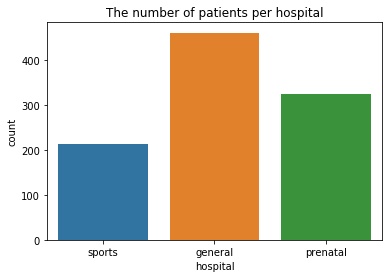

In [14]:
hist = sns.countplot(x='hospital',data=data)
hist.set_title('The number of patients per hospital')

The distribution of an individual **numeric** attribute can be discretised and visualised with a histogram using `distplot`.

Let's explore the distribution of the patients' height in our data set:

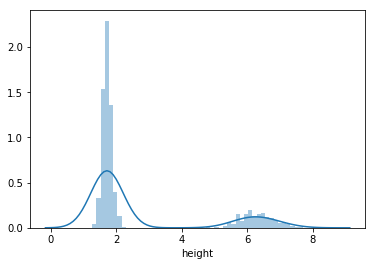

In [15]:
sns.distplot(data['height'])

<b><font color = 'red'>Question 1.5: </font> Looking at the plot above, explain what is the problem with the height measurements in the data set. Fix it, and then look into the distribution again. </b>

<i>Hint: to fix the issue, you may need to use <a href = https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html>`DataFrame.loc[]`</a> indexer.</i>

The heights on the right side of the plot are in a different unit than those on the left side of the plot.

To fix this, we need to convert them to the same unit. We'll do this by converting all heights > 3 from feet to meters (1 foot = 0.3048 meters)

In [16]:
data.loc[(data['height']>3),'height'] = 0.3048 * data.loc[(data['height']>3),'height']

### Pairs of attributes

Pairwise attribute relationships can be visualised with variations of a scatter plot. Furthermore, the third variable can be brought into the mix via colouring data points. See <a href = 'https://seaborn.pydata.org/generated/seaborn.catplot.html'>`seaborn.catplot`</a> for more info.

We start with visualising a pair of categorical attributes: `diagnosis` and `hospital`

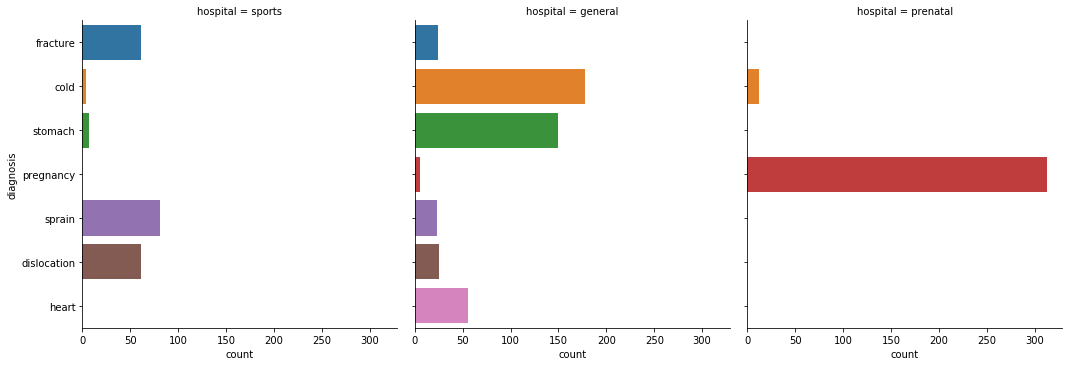

In [17]:
sns.catplot(y='diagnosis', col='hospital', data=data, kind='count')

[Your observations here]

Let's now visualise the patients' `weight` distribution with respect to the `hospital` type.

`violinplot` shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

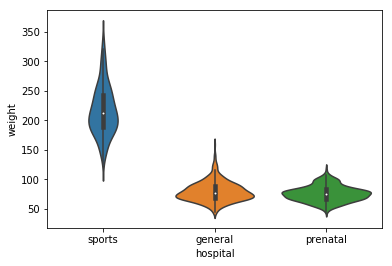

In [18]:
sns.violinplot(x='hospital',y='weight',data=data)

<b><font color = 'red'>Question 1.6: </font> The weight values from the sports hospital seem unnaturally high. What is the problem? Can you fix it?</b>

The weight values of the sports hospital are in a different unit than those of the other hospitals.

To fix this, we need to convert them to the same unit. The weights of the sports are most likely in pounds, while those of the other two hospitals are probably in kilograms. We'll convert the weights of the sports hospital to kilograms by multiplying them by 0.453592.

In [19]:
data.loc[(data['hospital']=='sports'),'weight'] = 0.453592 * data.loc[(data['hospital']=='sports'),'weight']

Now that the `weight` and `height` measures are all in the same units, we can look into their mutual distributuion.

With `jointplot` one can draw a scatter plot of two numerical features along with their univariate distribution.

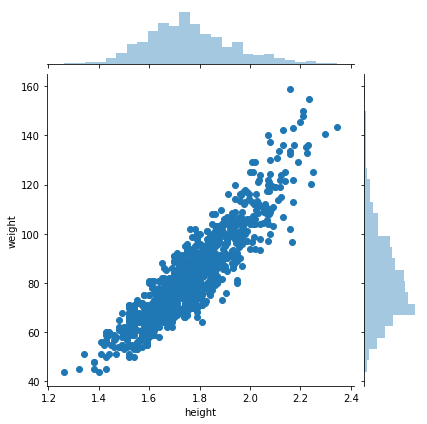

In [20]:
sns.jointplot(x='height', y='weight', data=data, kind='scatter')

<b><font color = 'red'>Question 1.7: </font> Make the same plot for `height` and `bmi`. Discuss the two plots.</b>

[Your observations here]

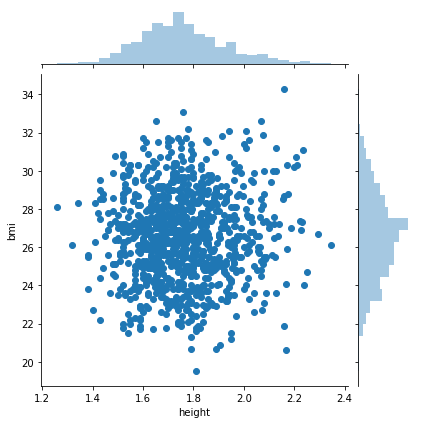

In [21]:
sns.jointplot(x='height', y='bmi', data=data, kind='scatter')

<center>
<b> This is the end of the first exercise. Please proceed with the next notebook.</b>
</center>

## References

[1] Pandas documentation (<a href = http://pandas.pydata.org/pandas-docs/stable/>link</a>)
<br>
[2] Seaborn documentation (<a href = https://seaborn.pydata.org/>link</a>)
<br>
[3] Open Machine Learning Course. Topic 1. Exploratory data analysis with Pandas (<a href = 'https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68'>link</a>)